In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [26]:
X=dataset.drop(['Exited'],axis=1)
y=dataset['Exited']

In [28]:
#Create dummy variable
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [29]:
X=pd.concat([X,geography,gender],axis=1)
X.drop(['Geography','Gender'],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
X.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany              uint8
Spain                uint8
Male                 uint8
dtype: object

In [27]:
X.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)

In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany              uint8
Spain                uint8
Male                 uint8
dtype: object

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [30]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [31]:
X.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany              uint8
Spain                uint8
Male                 uint8
dtype: object

In [ ]:
X.shape

(10000, 11)

In [ ]:
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [34]:
#intalling keras library and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import  LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [35]:
#Initialising ther ANN
classifier=Sequential()

In [36]:
#Adding the input layer and and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11)) 


In [37]:
#Adding the secound hidden layers
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [38]:
#Adding the output layers
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [39]:
#COMPILLING THE ANN
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
#Fitting Ann  to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.7735 - accuracy: 0.6194 - val_loss: 0.5479 - val_accuracy: 0.7876
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7784 - val_loss: 0.4716 - val_accuracy: 0.8035
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.8022 - val_loss: 0.4396 - val_accuracy: 0.8145
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8219 - val_loss: 0.4206 - val_accuracy: 0.8236
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3945 - accuracy: 0.8371 - val_loss: 0.4064 - val_accuracy: 0.8311
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8366 - val_loss: 0.3941 - val_accuracy: 0.8353
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8572 - val_loss: 0.3844 - val_accuracy: 0.8410

In [41]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


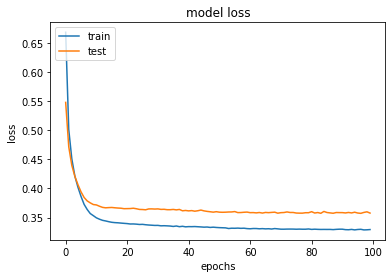

In [44]:
#Summarize history for accuarcy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel(('loss'))
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [45]:
#making the prediction and evaluating the model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


In [48]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [49]:
score

0.864